<a href="https://colab.research.google.com/github/Selenelez29/FinalAssignment/blob/main/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 ━━━━━╸━━━━━━━━━━━━━━━╸━━━   0.0 B /  ??.?MB @  ??.?MB/s

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [ ]:
import yfinance as yf

# Crear un objeto Ticker para el símbolo de cotización "TSLA"
tesla_ticker = yf.Ticker("TSLA")

# Obtener datos históricos de precios de las acciones
tesla_stock_data = tesla_ticker.history(period="max")

# Mostrar los primeros registros del DataFrame
print(tesla_stock_data.head())

                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [ ]:
import yfinance as yf

# Create a Ticker object for the stock symbol "TSLA"
tesla_ticker = yf.Ticker("TSLA")

# Extract stock information using the history function
tesla_data = tesla_ticker.history(period="max")

# Display the first few rows of the DataFrame
print(tesla_data.head())


                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [ ]:
# Reset the index of tesla_data
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [ ]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as html_data
html_data = response.text


Parse the html data using `beautiful_soup`.


In [ ]:
from bs4 import BeautifulSoup

# Create a BeautifulSoup object
soup = BeautifulSoup(html_data, 'html.parser')

# Print the parsed HTML content (optional)
# print(soup.prettify())


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Find the table containing Tesla Revenue
table = soup.find_all("table")[0]

# Extract the table data into a DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Set column names to Date and Revenue
tesla_revenue.columns = ["Date", "Revenue"]

# Display the DataFrame
print(tesla_revenue.head())


   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [ ]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [ ]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data (adjust the period as needed)
gme_data = gme_ticker.history(period="max")

# Display the first 5 rows of the GME stock data
print(gme_data.head())


                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [ ]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data with 'max' period
gme_data = gme_ticker.history(period="max")

# Display the first 5 rows of the GME stock data
print(gme_data.head())


                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578048  1.607504   7410400        0.0   
2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [ ]:
# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first 5 rows of the gme_data DataFrame
print(gme_data.head())


   index       Date      Open      High       Low     Close    Volume  \
0      0 2002-02-13  1.620128  1.693350  1.603296  1.691667  76216000   
1      1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600   
2      2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600   
3      3 2002-02-19  1.666418  1.666418  1.578048  1.607504   7410400   
4      4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [ ]:
import requests

# URL of the webpage containing GME revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content as a variable named html_data
    html_data = response.text
    print("HTML data has been successfully retrieved.")
else:
    print(f"Failed to retrieve HTML data. Status Code: {response.status_code}")


HTML data has been successfully retrieved.


Parse the html data using `beautiful_soup`.


In [ ]:
import requests

# URL of the webpage containing GME revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content as a variable named html_data
    html_data = response.text
    print("HTML data has been successfully retrieved.")
else:
    print(f"Failed to retrieve HTML data. Status Code: {response.status_code}")

HTML data has been successfully retrieved.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [ ]:
import pandas as pd

# Find the table with GameStop Revenue
table = soup.find('table', {'class': 'data-table'})

# Check if the table is found
if table:
    # Extract data from the table
    data = []
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

    # Create a DataFrame
    gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

    # Remove comma and dollar sign from the Revenue column
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$', '')

    # Display the last 5 rows of the gme_revenue DataFrame
    print(gme_revenue.tail())
else:
    print("Table not found. Check if the class 'data-table' exists in the HTML.")


Table not found. Check if the class 'data-table' exists in the HTML.


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [ ]:
# Assuming you've already downloaded the HTML data and parsed it using BeautifulSoup
# Extract the table with GameStop Revenue
table = soup.find('table')
data = []

# Extract data from the table
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])

# Create a DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Remove commas and dollar signs from the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# Display the last five rows of the gme_revenue dataframe
print(gme_revenue.tail())


    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


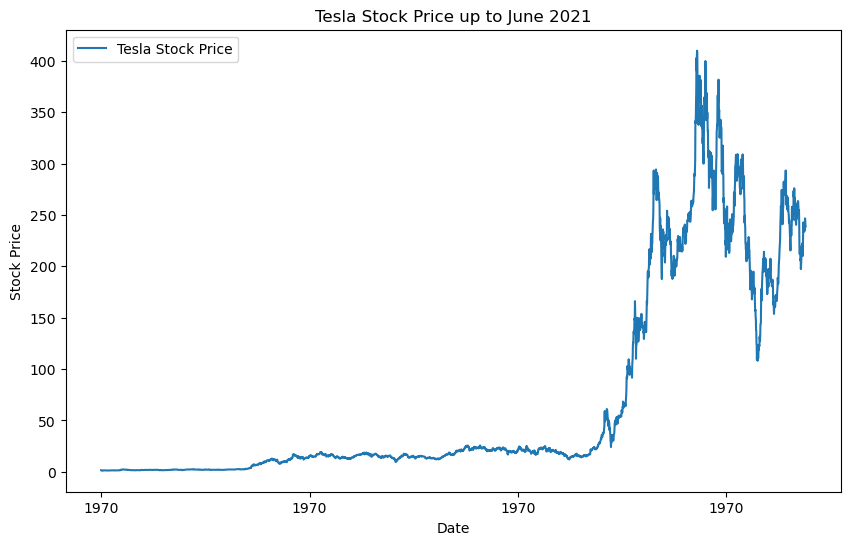

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have tesla_data and tesla_revenue dataframes

# Convert 'Date' column to datetime format if not already
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Convert string date to datetime object
cutoff_date = pd.to_datetime('2021-06-30')

# Filter data up to June 2021
tesla_data = tesla_data[tesla_data.index <= cutoff_date]
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= cutoff_date]

# Plotting the stock data
plt.figure(figsize=(10, 6))
plt.plot(tesla_data.index, tesla_data['Close'], label='Tesla Stock Price')

# Add title and labels
plt.title('Tesla Stock Price up to June 2021')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Show legend
plt.legend()

# Display the plot
plt.show()

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


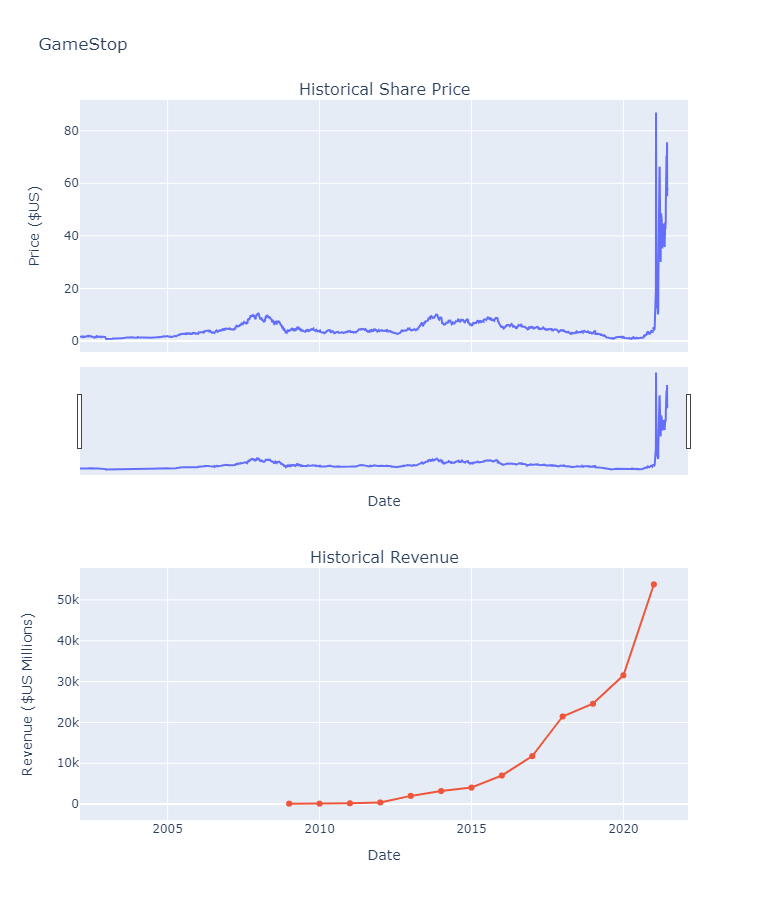

In [ ]:
# Convert index to datetime format
gme_data.index = pd.to_datetime(gme_data.index)

# Filter data up to June 2021
cutoff_date = '2021-06-30'
gme_data = gme_data[gme_data.index <= cutoff_date]
gme_revenue = gme_revenue[gme_revenue['Date'] <= 'June-2021']

# Plotting the stock data for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2>

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
